<font ><b><h1 style="font-size:3em;"><center>CHAPTER 2</center></h1></b>

# Contents
1. Problem Statement
2. Theory
    1. Revisiting the mean-field induction equation
    2. Dynamo number
4. Numerical Solution to Galactic magnetic Fields with $\alpha-\Omega$ approximation
    1. Solver: Crank-Nicholson
    2. Grid and boundary conditions

THE CODE
1. Example 1 - Decaying fields
1. Example 2 - Growing fields

<hr><hr>

# 2.1 - Problem Statement

Solve the mean-field $\alpha-\Omega$ dynamo equations in the kinematic regime. That is, include the $\Omega$ effect term in the equation for $\dfrac{\partial \bar{B}_\phi}{\partial t}$ and the $\alpha$ effect term in the equation for $\dfrac{\partial \bar{B}_r}{\partial t}$. This requires specifying the overall magnitude and spatial dependence of $\Omega$ and $\alpha$.
* Repeat the investigation you had done for task 1, with the new equations, for different values of the dynamo number, $D$
$$ D = − \dfrac{\alpha_0 q \Omega h^3}{\eta_t^2} $$
where $q = − \dfrac{d \ln \Omega}{d \ln r}$ and $\alpha_0 > 0$ is the amplitude of the $\alpha$ effect. Note that $q > 0$ if $\Omega$ decreases with $r$, which is generally the case in galaxies, so $D < 0$.
* The exponential decay becomes exponential growth if $|D| > |D_c|$, where $D_c$ is the critical dynamo number. Find the critical dynamo number numerically (ideally, you would automate this feature).
* Compare the growth rate you obtain for a given value of $D$ (for $|D| > |D_c|$) with the no-z solution prediction for the local growth rate $\gamma$. Do the same comparison for $D_c$ . Do the results agree with your expectations?

<hr><hr>

# 2.2 - Theory

In the previous chapter, we studied how the galactic magnetic field varies with time in the $z$-direction. For that we covered the diffusion equation, its numerical solution using Crank-Nicholson method and some example seed fields, and finally calculated the decay rate.

## 2.2.1 - Revisiting the mean-field induction equation

In this chapter, we will begin with the kinematic regime of the solutions, beginning with the addition of the $\alpha-\Omega$ term in uor equations. Lets revisit the mean-field induction equation.


$$ \dfrac{\partial \bar{\mathbf{B}}}{\partial t} = \nabla \times \left[ \bar{\mathbf{V}} \times \bar{\mathbf{B}} + \mathcal{E} - \eta \left( \nabla \times \bar{\mathbf{B}} \right) \right] $$
where $\mathcal{E} = \left( \alpha \bar{\mathbf{B}} \right) - \eta_t \left( \nabla \times \bar{\mathbf{B}} \right)$

We will solve the equations in the cylindrical coordinates (r, $\phi$, z) with the origin at the galactic centre and the z-axis parallel to the galactic angular velocity. However, to simplify things, lets make some approximations again.

1. Consider $\bar{V}$ to be of this form, taking $\eta_T = \eta + \eta_t$,
$$ \mathbf{\bar{V}} = \bar{V}_r(r) \mathbf{\hat{r}} + r \Omega(r) \mathbf{\hat{\phi}} + \bar{V}_z(r, z) \mathbf{\hat{z}} $$


2. Take $\eta_T$ independent of $\bar{\mathbf{B}}$. Our equation becomes
But $\nabla \times \left( \nabla \times \bar{\mathbf{B}} \right) = \nabla \left( \nabla \cdot \bar{\mathbf{B}} \right) - \nabla^2 \bar{\mathbf{B}} $ and $\nabla \cdot \bar{\mathbf{B}} = 0$ (Gauss's Law). So we get,

$$ \boxed{ \dfrac{\partial \bar{\mathbf{B}}}{\partial t} = \nabla \times \left( \bar{\mathbf{V}} \times \bar{\mathbf{B}} \right) + \nabla \times \left(\alpha \bar{\mathbf{B}} \right) - \eta_T \left( \nabla \times \nabla \times \bar{\mathbf{B}} \right) } $$

3. Solving again in cylindrical coordinates and taking azimuthal symmetry, we can write the equations for $\bar{B}_r$ and $\bar{B}_{\phi}$ as

$$ \frac{\partial \bar{B}_r}{\partial t} = V_r \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_r)}{\partial z} - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \eta_T \left[ \frac{\partial^2 \bar{B}_r}{\partial z^2} + \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_r \right) \right) \right] $$

$$ \frac{\partial \bar{B}_\phi}{\partial t} = r \Omega \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_\phi)}{\partial z} - \frac{\partial (V_r \bar{B}_\phi)}{\partial r} + \frac{\partial (r \Omega \bar{B}_r)}{\partial r} + \frac{\partial (\alpha \bar{B}_r)}{\partial z} - \frac{\partial (\alpha \bar{B}_z)}{\partial r} + \eta_T \left[ \frac{\partial^2 \bar{B}_\phi}{\partial z^2} + \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_\phi \right) \right) \right] $$

4. Taking the $\alpha-\Omega$ approximation and putting the value $q = -\dfrac{\partial \ln \Omega}{\partial \ln r} = -\dfrac{r}{\Omega} \dfrac{\partial \Omega}{\partial r}$ we obtain

$$ \frac{\partial \bar{B}_r}{\partial t} = - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} $$
$$ \frac{\partial \bar{B}_\phi}{\partial t} = -q \Omega \bar{B}_r + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} $$

Here we have neglected all terms which involved $\dfrac{\partial}{\partial r}$ in $B$. We have also omitted the $\alpha^2$ term for now.

5. Finally consider $\alpha = \alpha_0$ to be independent of $z$. So our final equations are

$$ \boxed{ \frac{\partial \bar{B}_r}{\partial t} = - \alpha_0\frac{\partial (\bar{B}_\phi)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2}} \qquad \qquad \text{and} \qquad \qquad \boxed{ \frac{\partial \bar{B}_\phi}{\partial t} = -q \Omega \bar{B}_r + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} } $$

<hr>

## 2.2.2 - Dynamo number

The dynamo number is defined as 

$$ D = − \dfrac{\alpha_0 q \Omega_0 h^3}{\eta_t^2} $$
Here $h$ is the thickness of the thin disk of the galaxy, $\alpha$ is the term responsible for the twisting of the toroidal fields into poloidal fields, $\Omega$ is the rotation rate fo the galaxy, causing the twisting of poloidal fields into toroidal fields, and $q = -\dfrac{\partial \ln \Omega}{\partial \ln r} = -\dfrac{r}{\Omega} \dfrac{\partial \Omega}{\partial r}$.

One can parameterize $\Omega$ as
$$ \Omega = \dfrac{\Omega_0}{\sqrt{1 + \left( \dfrac{r}{r_{\omega}} \right)^2 }} $$

Thus $q$ solves as 
$$ q = \left( \dfrac{r^2}{r_{\omega}^2} \right) \left( 1 + \dfrac{r^2}{r_{\omega}^2} \right)^{-1} $$

For Milky Way galaxy, we have the  $r_{\omega} = 2$ kpc, AND the peak rotational velocity $v$ AT $r_{\omega}$ 220 km/s. This gives us $\Omega_0 = \dfrac{220 \text{ km/s}}{2 \text{ kpc}} = 110$ km/s/kpc. Putting these, we get $q = 0.98$.

We will also get an estimate of the value of $\alpha_0$
$$ \begin{aligned}
\alpha_0 &= \dfrac{\tau^2 v^2 \Omega}{h} \\
&= \dfrac{(10 \text{ Myrs})^2 \times (10 \text{ km/s})^2 \times 110 \text{ km/s/kpc} }{ 100 \text{ pc}} \\
&= 11 \text{ km/s} \quad = \quad 0.1124 \text{ (100 pc/Myrs)}
\end{aligned} $$


However, in this chapter, we will vary $\alpha_0$ and see how the magnetic fields behave. 

With the values $\eta_T = 3.48 \times 10^{-2}\text{ (100 pc)}^2/\text{ Myr}$ (as chosen previously), $h = 100$ pc (typical thickness of thin disks), the critical dynamo number is found to be, 
$$ \begin{aligned}
D &= − \dfrac{\alpha_0 \times 0.98 \times 110 \text{ km/s/kpc} \times (100 \text{ pc})^3}{(3.48 \times 10^{-2}\text{ (100 pc)}^2/\text{ Myr})^2} \\
&= -0.948 \: \alpha_0
\end{aligned} $$

where $\alpha_0$ is in km/s.

# 2.3 - Numerical Solution to Galactic magnetic Fields with $\alpha-\Omega$ approximation



Now we begin to solve the equations numerically. 


## 2.3.1 - Solver: Crank-Nicholson (modified for coupled equations)

We had used the Crank-Nicholson method for solving the 1D diffusion equation in the previous chapter, however, things get complicated when we mpove to coupled diffusion equations, like in this case. Let us understand the discretization scheme for coupled diffusion equations.

Let $\bar{B}_r = P$ and $\bar{B}_\phi = Q$ for understanding purposes. Our equations modify to
$$ \frac{\partial P}{\partial t} = - \alpha_0 \frac{\partial Q}{\partial z} + \eta_T \frac{\partial^2 P}{\partial z^2} $$
$$ \frac{\partial Q}{\partial t} = -q \Omega P + \eta_T \frac{\partial^2 Q}{\partial z^2} $$

Lets first discretize equations,
$$ \frac{P^{j+1}_{i} - P^{j}_{i}}{dt} = -\dfrac{\alpha_0}{2} \: \left( \frac{Q^{j+1}_{i+1} - Q^{j+1}_{i}}{dz} + \frac{Q^{j}_{i+1} - Q^{j}_{i}}{dz} \right) \dfrac{\eta_T}{2} \: \left( \dfrac{P^{j+1}_{i+1} - 2P^{j+1}_{i} + P^{j+1}_{i-1}}{dz^2} + \dfrac{P^{j}_{i+1} - 2P^{j}_{i} + P^{j}_{i-1}}{dz^2} \right) $$
and 
$$ \frac{Q^{j+1}_{i} - Q^{j}_{i}}{dt} = -q\Omega \left( \frac{P^{j+1}_{i} - P^{j}_{i}}{2} \right) + \dfrac{\eta_T}{2} \: \left( \dfrac{Q^{j+1}_{i+1} - 2Q^{j+1}_{i} + Q^{j+1}_{i-1}}{dz^2} + \dfrac{Q^{j}_{i+1} - 2Q^{j}_{i} + Q^{j}_{i-1}}{dz^2} \right) $$

Putting $\dfrac{\alpha_0 \: dt}{2 \: dz} = \mu$ and $\dfrac{\eta_T \: dt}{2 \: dz^2} = \nu$, we separate the present time-step $(j+1)$ and the past time-step $(j)$ as
$$ \left(1+2\nu \right) P^{j+1}_{i} - \nu  P^{j+1}_{i+1} - \nu P^{j+1}_{i-1} + \mu Q^{j+1}_{i+1} - \mu Q^{j+1}_{i} = \left(1-2\nu \right) P^{j}_{i} + \nu  P^{j}_{i+1} + \nu P^{j}_{i-1} - \mu Q^{j}_{i+1} + \mu Q^{j}_{i} $$
and 
$$ \left(1+2\nu \right) Q^{j+1}_{i} - \nu  Q^{j+1}_{i+1} - \nu Q^{j+1}_{i-1} + \dfrac{dt \: q \Omega}{2} P^{j+1}_{i} = \left(1-2\nu \right) Q^{j}_{i} + \nu  P^{j}_{i+1} + \nu P^{j}_{i-1} - \dfrac{dt \: q \Omega}{2} P^{j}_{i} $$



Let $U = \left[ P \:\: Q\right]^T$
This whole coupled equation can be simplified to single variable $U$ as
$$ \left[\begin{array}{cc}1+2 \nu & -\mu \\ \dfrac{dt \: q \Omega}{2} & 1+2 \nu \end{array}\right] U^{j+1}_{i} + \left[\begin{array}{cc}-\nu & \mu \\ 0 & -\nu \end{array}\right] U^{j+1}_{i+1} + \left[\begin{array}{cc}-\nu & 0 \\ 0 & -\nu \end{array}\right] U^{j+1}_{i-1} = \left[\begin{array}{cc}1-2 \nu & \mu \\ -\dfrac{dt \: q \Omega}{2} & 1-2 \nu \end{array}\right] U^{j}_{i} + \left[\begin{array}{cc}\nu & -\mu \\ 0 & \nu \end{array}\right] U^{j}_{i+1} + \left[\begin{array}{cc}\nu & 0 \\ 0 & \nu \end{array}\right] U^{j}_{i-1} $$



Renaming these $2 \times 2$ matrices $E$, $F$, $G$, $H$, $I$ and $J$ from left to right respectively, we can write it as 
$$ E U^{j+1}_{i} + F U^{j+1}_{i+1} + G U^{j+1}_{i-1} = H U^{j}_{i} + I U^{j}_{i+1} + J U^{j}_{i-1} $$

Again we can now form the final matrix, however, this time, it is a bit different.
$$ \widetilde{M}U^{j+1} = \widetilde{N}U^{j} $$
Here, the final matrices $\widetilde{M}$ and $\widetilde{N}$ are the tensor product of the above 6 matrices and the M, N matrices from the previous chapter. The final matrix would look something like this



$$ \widetilde{M} = \left[\begin{array}{cc} \left[\begin{array}{ccccc}1+2 \nu & -\nu & 0 & \cdots & 0 \\ -\nu & 1+2 \nu & -\nu & \ddots & \vdots \\ 0 & -\nu & 1+2 \nu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\nu \\ 0 & \cdots & 0 & -\nu & 1+2 \nu\end{array}\right] & 
\left[\begin{array}{ccccc}-\mu & \mu & 0 & \cdots & 0 \\ 0 & -\mu & \mu & \ddots & \vdots \\ 0 & 0 & -\mu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \mu \\ 0 & \cdots & 0 & 0 & -\mu \end{array}\right] \\ & \\
\left[\begin{array}{ccccc} \dfrac{dt\: q \Omega}{2} & 0 & 0 & \cdots & 0 \\ 0 & \dfrac{dt\: q \Omega}{2} & 0 & \ddots & \vdots \\ 0 & 0 & \dfrac{dt\: q \Omega}{2} & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & 0 \\ 0 & \cdots & 0 & 0 & \dfrac{dt\: q \Omega}{2} \end{array}\right] & 
\left[\begin{array}{ccccc}1+2 \nu & -\nu & 0 & \cdots & 0 \\ -\nu & 1+2 \nu & -\nu & \ddots & \vdots \\ 0 & -\nu & 1+2 \nu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\nu \\ 0 & \cdots & 0 & -\nu & 1+2 \nu\end{array}\right] \end{array}\right] $$

and 

$$ \widetilde{N} = \left[\begin{array}{cc} \left[\begin{array}{ccccc}1-2 \nu & \nu & 0 & \cdots & 0 \\ \nu & 1-2 \nu & \nu & \ddots & \vdots \\ 0 & \nu & 1-2 \nu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \nu \\ 0 & \cdots & 0 & \nu & 1-2 \nu\end{array}\right] & 
\left[\begin{array}{ccccc} \mu & -\mu & 0 & \cdots & 0 \\ 0 & \mu & -\mu & \ddots & \vdots \\ 0 & 0 & \mu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\mu \\ 0 & \cdots & 0 & 0 & \mu \end{array}\right] \\ & \\
\left[\begin{array}{ccccc} -\dfrac{dt\: q \Omega}{2} & 0 & 0 & \cdots & 0 \\ 0 & -\dfrac{dt\: q \Omega}{2} & 0 & \ddots & \vdots \\ 0 & 0 & -\dfrac{dt\: q \Omega}{2} & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & 0 \\ 0 & \cdots & 0 & 0 & -\dfrac{dt\: q \Omega}{2} \end{array}\right] & 
\left[\begin{array}{ccccc}1-2 \nu & \nu & 0 & \cdots & 0 \\ \nu & 1-2 \nu & \nu & \ddots & \vdots \\ 0 & \nu & 1-2 \nu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \nu \\ 0 & \cdots & 0 & \nu & 1-2 \nu\end{array}\right] \end{array}\right] $$


The final answer i.e., $U^{j+1}$ is obtained as
$$ U^{j+1} = \widetilde{M}^{-1}\widetilde{N}U^{j} $$


## 2.3.2 - Grid and boundary conditions

We will use the same grid structure and boumndary conditions that we used in chapter 1.


<hr><hr>
<br>
<font ><b><h1 style="font-size:3em; font-family:serif"><center>THE CODE</center></h1></b>

For the full code with al functions and plotting scripts, please visit my <a href="https://github.com/chandan-kumarsahu/Galactic_Dynamo">github repository</a>.

Now let us get into some examples to understand how the magnetic field varies with different dynamo numbers.


In [1]:
from my_code import *
from plotting import *


# Example 1

We have already defined all the parameters in section 2.2.2.

For this example, we take an $\alpha$ for which the field is decaying.



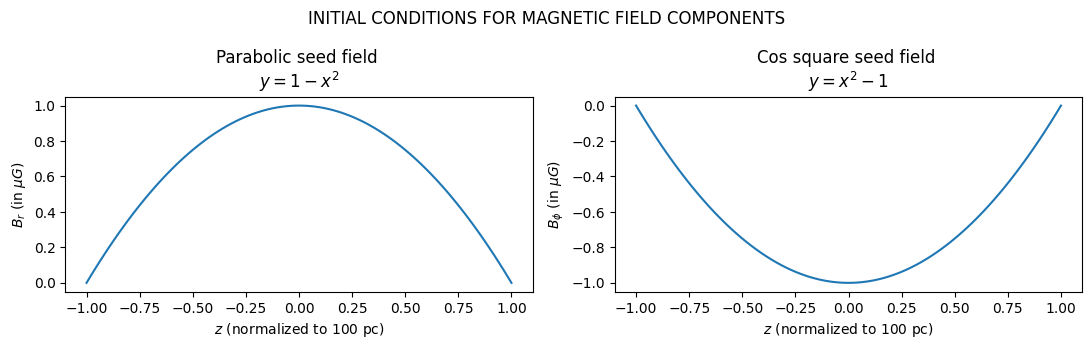

In [2]:
def init_cond_Br(x):
    return 1-x**2

def init_cond_Bphi(x):
    return -(1-x**2)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)
title_1 = r'Parabolic seed field '+'\n'+r'$ y = 1-x^2$'
title_2 = r'Cos square seed field '+'\n'+r'$ y = x^2-1$'
global_title = 'INITIAL CONDITIONS FOR MAGNETIC FIELD COMPONENTS'

plot_init_cond(z, init_cond_Br, init_cond_Bphi, title_1, title_2, global_title)
plt.show()


In [3]:
# Constants and parameters
eta_T = 3.48e-2                     # magnetic diffusivity in (100pc)^2/Myr
alpha = 50                          # alpha effect in km/s
Omega = 110*MYR*KM/(1000*PC)        # angular velocity, converted from km/s/kpc to 1/Myr
q = 0.98                            # shear parameter
t_max = 400                         # total simulation time
z_min = -1.0                        # minimum thickness of the disc
z_max = 1.0                         # thickness of the disc
dt = t_max/200                      # time step
dz = 0.01                           # spatial step in z direction
alpha = alpha*1e3*MYR/(100*PC)      # alpha effect, converted from km/s to 100pc/Myr

# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = matrix(len(z), 1+2*rho, -sigma, q*Omega*dt/2, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = matrix(len(z), 1-2*rho, sigma, -q*Omega*dt/2, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
solution = crank_nicolson_mod(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = solution[:len(z), :]
B_phi = solution[len(z):, :]


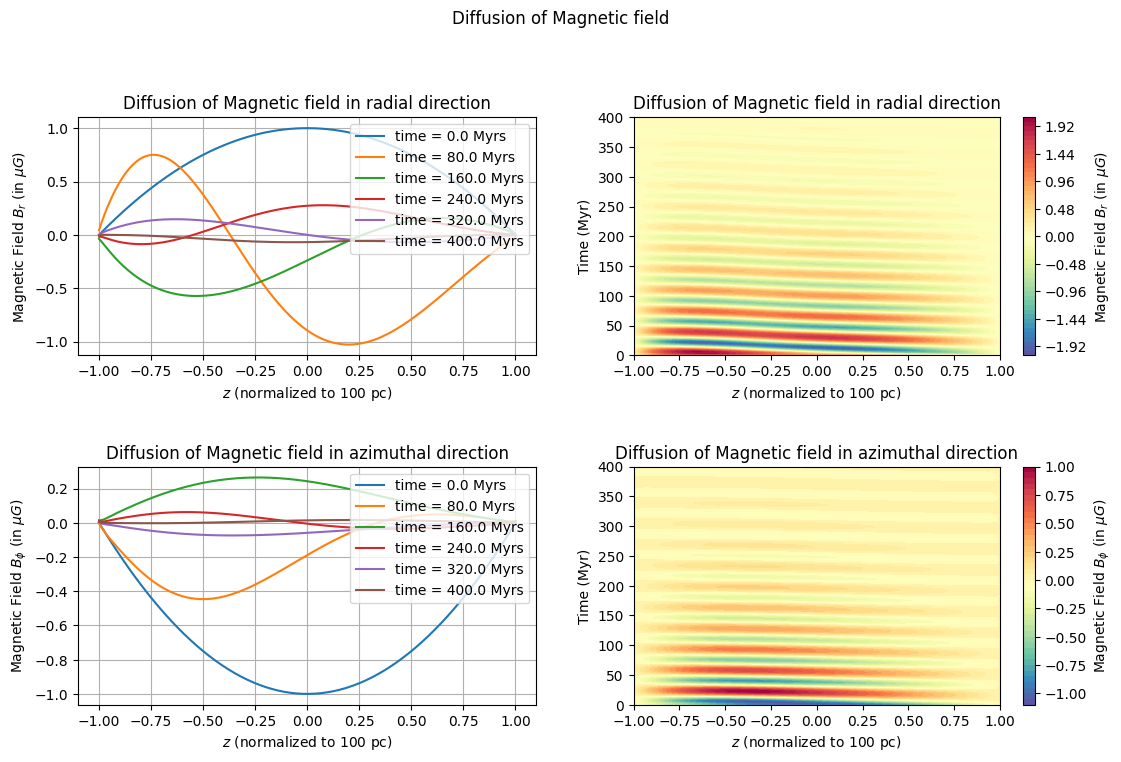

In [4]:
# Plot the solution in imshow
plot_diff(t, z, B_r, B_phi)
plt.show()

Here is an animation showing the evolution of $B_r$ and $B_{\phi}$ with time.

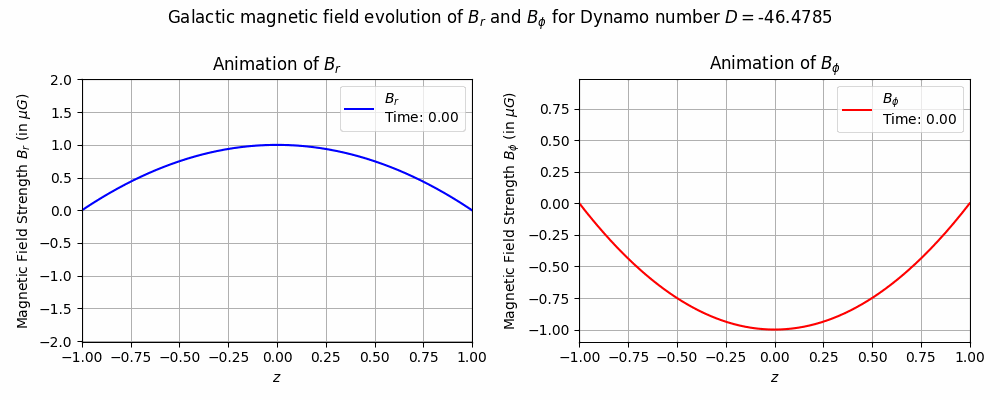

One can see that in this example, the fields are decaying with time. We will calculate the decay rate at the midplane, i.e., $z=0$. To calculate the decay rate, we will find how the maxima of the field at the midplane varies with time. 

For this, we will first calculate the local maxima of each variation and then fit an exponential decay to it. Let us first calculate the whole thing for a longer duration to get more data points.


In [5]:
# Constants and parameters
eta_T = 3.48e-2                     # magnetic diffusivity in (100pc)^2/Myr
alpha = 50                          # alpha effect in km/s
Omega = 110*MYR*KM/(1000*PC)        # angular velocity, converted from km/s/kpc to 1/Myr
q = 0.98                            # shear parameter
t_max = 400                         # total simulation time
z_min = -1.0                        # minimum thickness of the disc
z_max = 1.0                         # thickness of the disc
dt = t_max/200                      # time step
dz = 0.01                           # spatial step in z direction
alpha = alpha*1e3*MYR/(100*PC)      # alpha effect, converted from km/s to 100pc/Myr

# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = matrix(len(z), 1+2*rho, -sigma, q*Omega*dt/2, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = matrix(len(z), 1-2*rho, sigma, -q*Omega*dt/2, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
solution = crank_nicolson_mod(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = solution[:len(z), :]
B_phi = solution[len(z):, :]


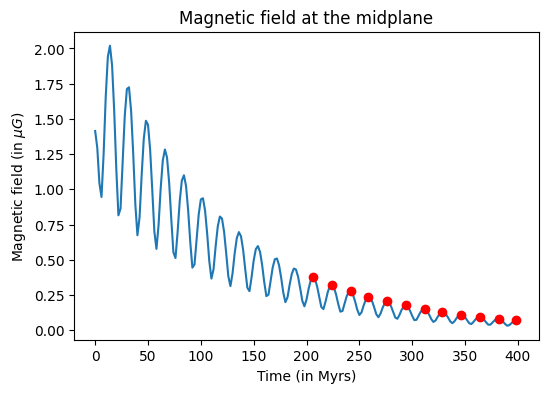

decay rate at the mid plane: 8.745e-03
Dynamo number  -46.47845120731219


In [6]:
B_mid_r = B_r[int(len(z)/2), :]
B_mid_phi = B_phi[int(len(z)/2), :]

B_mid = np.sqrt(B_mid_r**2 + B_mid_phi**2)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid)
x_max, y_max = find_local_maxima(t, B_mid)
plt.plot(x_max, y_max, 'ro')
plt.xlabel('Time (in Myrs)')
plt.ylabel('Magnetic field (in $\mu G$)')
# plt.yscale('log')
plt.title('Magnetic field at the midplane')
plt.show()

decay_rate = get_decay_rate(t, B_mid)
if decay_rate < 0:
    print(r"decay rate at the mid plane:", format(-decay_rate, ".3e"))
else:
    print(r"growth rate at the mid plane:", format(decay_rate, ".3e"))

print('Dynamo number ', -alpha*q*Omega*1**3/eta_T**2)


# Example 2

For this example, we take an $\alpha$ for which the field is decaying.



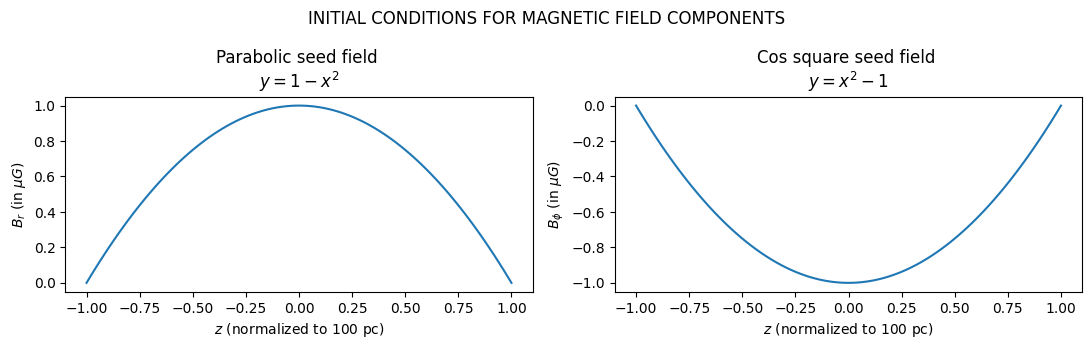

In [7]:
def init_cond_Br(x):
    return 1-x**2#(1-x**2)*np.cos(np.pi*x) #(1-x**2)*np.cos(2*np.pi*x)

def init_cond_Bphi(x):
    return -(1-x**2)#-(1-x**2)*np.cos(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)
title_1 = r'Parabolic seed field '+'\n'+r'$ y = 1-x^2$'
title_2 = r'Cos square seed field '+'\n'+r'$ y = x^2-1$'
global_title = 'INITIAL CONDITIONS FOR MAGNETIC FIELD COMPONENTS'

plot_init_cond(z, init_cond_Br, init_cond_Bphi, title_1, title_2, global_title)
plt.show()


In [8]:
# Constants and parameters
eta_T = 3.48e-2                     # magnetic diffusivity in (100pc)^2/Myr
alpha = 60                          # alpha effect in km/s
Omega = 110*MYR*KM/(1000*PC)        # angular velocity, converted from km/s/kpc to 1/Myr
q = 0.98                            # shear parameter
t_max = 400                         # total simulation time
z_min = -1.0                        # minimum thickness of the disc
z_max = 1.0                         # thickness of the disc
dt = t_max/200                      # time step
dz = 0.01                           # spatial step in z direction
alpha = alpha*1e3*MYR/(100*PC)      # alpha effect, converted from km/s to 100pc/Myr

# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = matrix(len(z), 1+2*rho, -sigma, q*Omega*dt/2, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = matrix(len(z), 1-2*rho, sigma, -q*Omega*dt/2, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
solution = crank_nicolson_mod(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = solution[:len(z), :]
B_phi = solution[len(z):, :]


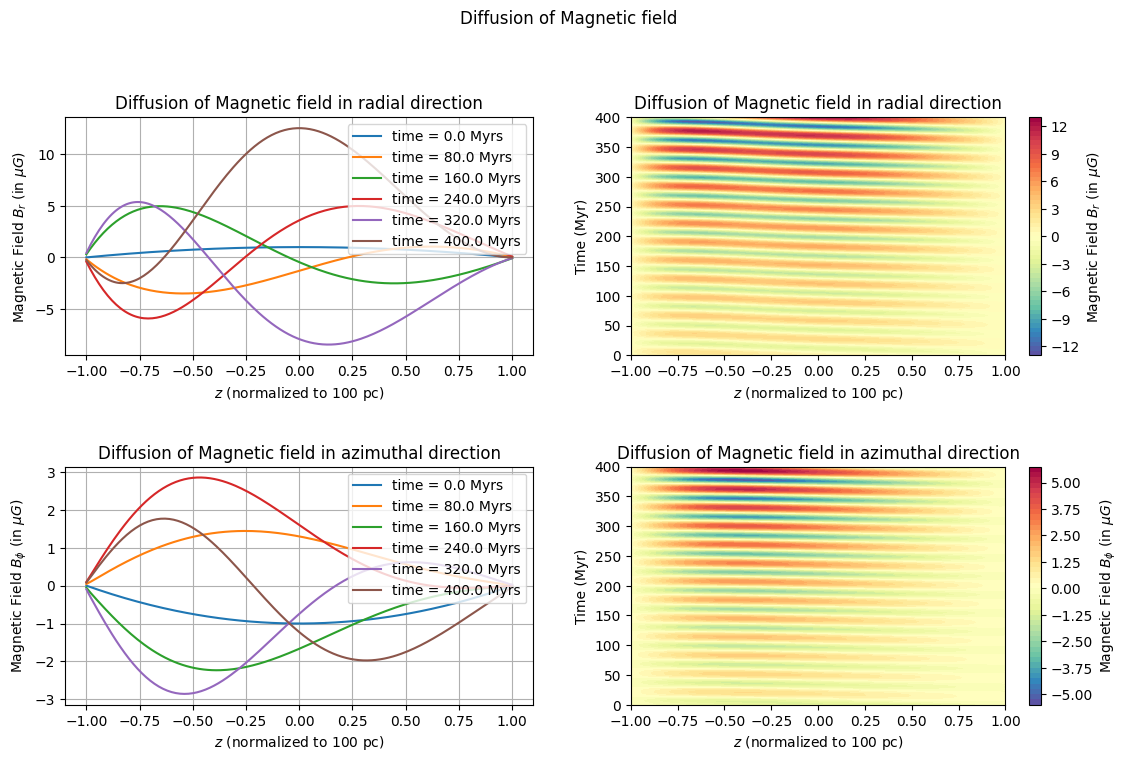

In [9]:
# Plot the solution in imshow
plot_diff(t, z, B_r, B_phi)
plt.show()

Here is an animation showing the evolution of $B_r$ and $B_{\phi}$ with time.

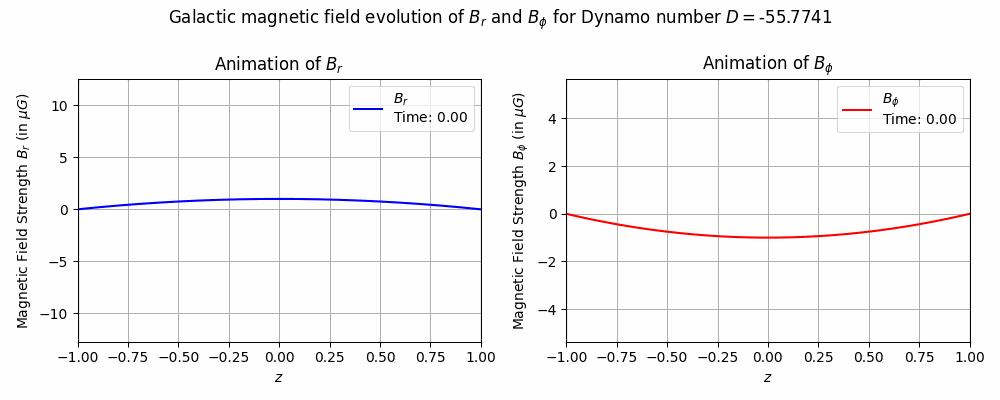

One can see that in this example, the fields are growing with time. We will calculate the growth rate at the midplane, i.e., $z=0$. To calculate the growth rate, we will find how the maxima of the field at the midplane varies with time. 

For this, we will first calculate the local maxima of each variation and then fit an exponential growth to it. Let us first calculate the whole thing for a longer duration to get more data points.


In [10]:
# Constants and parameters
eta_T = 3.48e-2                     # magnetic diffusivity in (100pc)^2/Myr
alpha = 60                          # alpha effect in km/s
Omega = 110*MYR*KM/(1000*PC)        # angular velocity, converted from km/s/kpc to 1/Myr
q = 0.98                            # shear parameter
t_max = 400                         # total simulation time
z_min = -1.0                        # minimum thickness of the disc
z_max = 1.0                         # thickness of the disc
dt = t_max/200                      # time step
dz = 0.01                           # spatial step in z direction
alpha = alpha*1e3*MYR/(100*PC)      # alpha effect, converted from km/s to 100pc/Myr

# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = matrix(len(z), 1+2*rho, -sigma, q*Omega*dt/2, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = matrix(len(z), 1-2*rho, sigma, -q*Omega*dt/2, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
solution = crank_nicolson_mod(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = solution[:len(z), :]
B_phi = solution[len(z):, :]


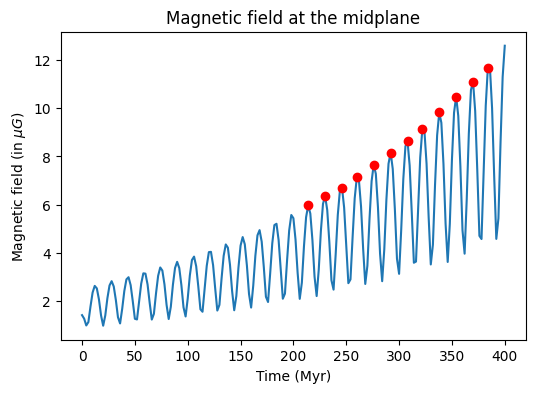

growth rate at the mid plane: 4.001e-03
Dynamo number  -55.77414144877462


In [11]:
B_mid_r = B_r[int(len(z)/2), :]
B_mid_phi = B_phi[int(len(z)/2), :]

B_mid = np.sqrt(B_mid_r**2 + B_mid_phi**2)

x_max, y_max = find_local_maxima(t, B_mid)
plot_aO_decay(t, B_mid, x_max, y_max)
plt.show()

decay_rate = get_decay_rate(t, B_mid)
if decay_rate < 0:
    print(r"decay rate at the mid plane:", format(-decay_rate, ".3e"))
else:
    print(r"growth rate at the mid plane:", format(decay_rate, ".3e"))

print('Dynamo number ', -alpha*q*Omega*1**3/eta_T**2)


## Calculation of Critical Dynamo number $D_c$

Calculating critical Dynamo number...
Critical Dynamo number Dc =  52.8105
Value of alpha at D_c = 56.8118 km/s


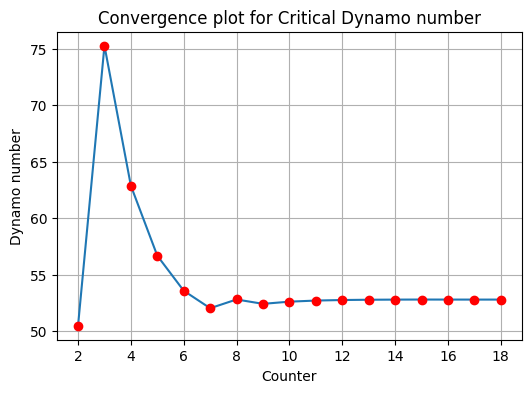

In [12]:
# Constants and parameters
eta_T = 3.48e-2                     # magnetic diffusivity in (100pc)^2/Myr
Omega = 110*MYR*KM/(1000*PC)        # angular velocity, converted from km/s/kpc to 1/Myr
q = 0.98                            # shear parameter
t_max = 400                         # total simulation time
z_min = -1.0                        # minimum thickness of the disc
z_max = 1.0                         # thickness of the disc
dt = t_max/200                      # time step
dz = 0.01                           # spatial step in z direction

tol = 1e-6


def f(D):
    alpha = D/(q*Omega*1**3/eta_T**2)
    # Spatial grid
    z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
    t = np.linspace(0, t_max, int(t_max / dt) + 1)

    # Coefficients for the matrix A and B
    rho = eta_T*dt/(2*dz**2)
    sigma = alpha*dt/(2*dz)

    A = matrix(len(z), 1+2*rho, -sigma, q*Omega*dt/2, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
    B = matrix(len(z), 1-2*rho, sigma, -q*Omega*dt/2, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

    # Solve the diffusion equation in radial direction
    solution = crank_nicolson_mod(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

    B_r = solution[:len(z), :]
    B_phi = solution[len(z):, :]
    B_mid_r = B_r[int(len(z)/2), :]
    B_mid_phi = B_phi[int(len(z)/2), :]

    B_mid = np.sqrt(B_mid_r**2 + B_mid_phi**2)

    decay_rate = get_decay_rate(t, B_mid)

    return decay_rate

print('Calculating critical Dynamo number...')
D_c, x_arr, y_arr = bisection(f, 1, 100, tol)
print('Critical Dynamo number Dc = ', np.round(D_c, 4))
print('Value of alpha at D_c =', np.round(D_c/(q*Omega*1**3/eta_T**2)/(1e3*MYR/(100*PC)), 4), 'km/s')

plt.figure(figsize=(6, 4))
plt.plot(x_arr, y_arr)
plt.plot(x_arr, y_arr, 'ro')
plt.xlabel('Counter')
plt.ylabel('Dynamo number')
plt.title('Convergence plot for Critical Dynamo number')
plt.grid()

plt.show()
